In [1]:
from __future__ import print_function, division, unicode_literals
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Usual imports
import numpy as np
import cv2
import json
import os
from os.path import join as path_join

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd
print("Working dir:", os.getcwd())

Working dir: /media/kursat/TOSHIBA EXT13/projects/FitSpace/Task-CV-FitSpace.Fashion


In [2]:
DATASET_PATH = "/media/kursat/TOSHIBA EXT13/projects/FitSpace/Task-CV-FitSpace.Fashion"
PARAM_PATH = path_join(DATASET_PATH, "parameter set")
TRAIN_PATH = path_join(DATASET_PATH, "train set")
ANNOTATIONS_PATH = path_join(DATASET_PATH, "Annotations")

data_filename = "Data.txt"
vertex_filename = "vertex_3k.txt"

data_param_1_filepath = path_join(PARAM_PATH, "batch01", data_filename)
data_param_2_filepath = path_join(PARAM_PATH, "batch02", data_filename)

vertex_param_1_filepath = path_join(PARAM_PATH, "batch01", vertex_filename)
vertex_param_2_filepath = path_join(PARAM_PATH, "batch02", vertex_filename)

full_csv_train_1_filepath = path_join(ANNOTATIONS_PATH, "train_set-1-full.csv")

# Read Data Contents

In [3]:
with open(data_param_1_filepath) as f:
    data_contents = f.readlines()
    
data_contents

['{\n',
 "\t'id':0,\n",
 "\t'dome rotation':0,0,0,\n",
 "\t'images': [\n",
 "\t'Render_0_Front',\n",
 "\t'Render_0_Side',\n",
 "\t'Render_0_Angle'\n",
 '\t],\n',
 "\t'parameters':{\n",
 "\t'Brows Arch': {-1},\n",
 "\t'Brows Centre Depth': {0},\n",
 "\t'Lip Upper Peak Height': {0}\n",
 '\t}\n',
 '}\n',
 '{\n',
 "\t'id':1,\n",
 "\t'dome rotation':0,0,0,\n",
 "\t'images': [\n",
 "\t'Render_1_Front',\n",
 "\t'Render_1_Side',\n",
 "\t'Render_1_Angle'\n",
 '\t],\n',
 "\t'parameters':{\n",
 "\t'Brows Arch': {-0.96},\n",
 "\t'Brows Centre Depth': {0},\n",
 "\t'Lip Upper Peak Height': {0}\n",
 '\t}\n',
 '}\n',
 '{\n',
 "\t'id':2,\n",
 "\t'dome rotation':0,0,0,\n",
 "\t'images': [\n",
 "\t'Render_2_Front',\n",
 "\t'Render_2_Side',\n",
 "\t'Render_2_Angle'\n",
 '\t],\n',
 "\t'parameters':{\n",
 "\t'Brows Arch': {-0.9199999999999999},\n",
 "\t'Brows Centre Depth': {0},\n",
 "\t'Lip Upper Peak Height': {0}\n",
 '\t}\n',
 '}\n',
 '{\n',
 "\t'id':3,\n",
 "\t'dome rotation':0,0,0,\n",
 "\t'images': [\

# Read Vertex Contents

In [4]:
with open(vertex_param_1_filepath) as f:
    vertex_data = f.readlines()
    
vertex_data

['[\n',
 '"batch": ["batch=0","camera=Camera_Front","image=0"],\n',
 '"indexes":{\n',
 '"1;2":[267.820083618164,36.295166015625],\n',
 '"2;8":[269.466552734375,129.224975585938],\n',
 '"3;9":[269.893524169922,150.816909790039],\n',
 '"4;10":[269.470657348633,134.381317138672],\n',
 '"5;11":[267.939239501953,37.4105224609375],\n',
 '"6;13":[269.361999511719,82.7407073974609],\n',
 '"7;14":[269.382705688477,85.7810668945313],\n',
 '"8;15":[269.370422363281,99.5943908691406],\n',
 '"9;16":[269.374755859375,104.714340209961],\n',
 '"10;17":[269.268005371094,106.130111694336],\n',
 '"11;18":[269.284805297852,105.02751159668],\n',
 '"12;19":[269.511611938477,115.077651977539],\n',
 '"13;20":[269.510162353516,118.999526977539],\n',
 '"14;21":[269.490921020508,121.683364868164],\n',
 '"15;22":[269.330627441406,80.1631164550781],\n',
 '"16;35":[269.613540649414,202.527221679688],\n',
 '"17;36":[269.2001953125,37.815673828125],\n',
 '"18;37":[269.113098144531,29.3683929443359],\n',
 '"19;38":[26

# Read train csv

In [5]:
df = pd.read_csv(full_csv_train_1_filepath, index_col=0)
df

,id,batch_id,camera_type,dome rotation x,dome rotation y,dome rotation z,Brows Arch,Brows Centre Depth,Lip Upper Peak Height,1;2_x,...,2995;16530_x,2995;16530_y,2996;16531_x,2996;16531_y,2997;16532_x,2997;16532_y,2998;16533_x,2998;16533_y,2999;16534_x,2999;16534_y
0,0,0,Front,162.18,162.18,162.18,-0.6,-0.8,0.036022,202.269409,...,258.131271,254.345734,136.397369,254.345734,259.047867,255.745636,135.481140,255.745636,260.405624,256.678070
1,0,0,Angle,162.18,162.18,162.18,-0.6,-0.8,0.036022,312.865021,...,397.911057,236.383133,339.410080,234.935852,398.383957,237.586182,338.858246,236.203049,399.094681,238.411926
2,0,0,Side,162.18,162.18,162.18,-0.6,-0.8,0.036022,355.907684,...,413.182556,262.005768,427.185898,262.540833,413.067520,263.000397,427.316177,263.635437,412.903137,263.671326
3,1,0,Front,108.28,108.28,108.28,-0.6,-0.8,0.493784,277.435257,...,332.099030,290.365875,226.751648,290.365875,333.018951,291.748169,225.831512,291.748169,334.391403,292.688171
4,1,0,Angle,108.28,108.28,108.28,-0.6,-0.8,0.493784,307.431107,...,392.442017,260.678406,332.922821,261.034332,392.916092,261.864807,332.367249,262.319000,393.628525,262.667480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,23,0,Angle,136.64,136.64,136.64,-0.6,-0.5,0.645605,320.521393,...,406.692062,250.794632,350.645569,250.411789,407.140900,251.946304,350.121887,251.642807,407.815613,252.730255
71,23,0,Side,136.64,136.64,136.64,-0.6,-0.5,0.645605,348.402679,...,415.862900,265.262878,431.819977,266.187469,415.734406,266.346069,431.968597,267.397583,415.550644,267.075012
72,24,0,Front,158.63,158.63,158.63,-0.6,-0.5,0.163342,283.444092,...,340.369232,279.666321,232.019226,279.666321,341.306427,281.073975,231.081787,281.073975,342.704742,282.031799
73,24,0,Angle,158.63,158.63,158.63,-0.6,-0.5,0.163342,308.669556,...,401.402969,261.264130,340.845612,261.671600,401.880554,262.471375,340.284454,262.981201,402.598373,263.287140


# Load Images

In [7]:
def load_face_image(face_id, batch_id, camera_type, root_path):
    image_path = path_join(root_path, "batch{:02d}".format(batch_id), "Rendering")
    image_name = "Render_{}_{}.png".format(face_id, camera_type)
    
    image_fullname = path_join(image_path, image_name)
    image = mpimg.imread(image_fullname)
    
    return image

def load_face_row_image(pandas_row, root_path):
    face_id = pandas_row['id']
    batch_id = pandas_row['batch_id']+1
    camera_type = pandas_row['camera_type']
    
    image = load_face_image(face_id, batch_id, camera_type, root_path)
    
    return image

In [8]:
pandas_row = df.sample(n=1).iloc[0]
pandas_row

id                          6
batch_id                    0
camera_type              Side
dome rotation x         25.95
dome rotation y         25.95
                      ...    
2997;16532_y       273.203186
2998;16533_x       425.553574
2998;16533_y       274.860168
2999;16534_x       410.483383
2999;16534_y       273.903259
Name: 20, Length: 6007, dtype: object

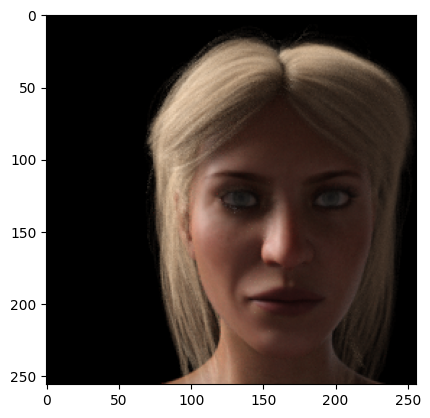

In [8]:
image = load_face_row_image(pandas_row, TRAIN_PATH)
image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
plt.imshow(image)

(512, 512, 3)


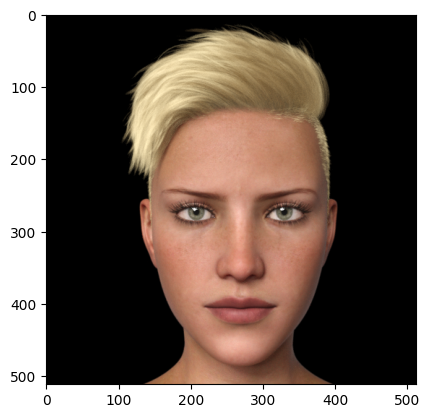

In [9]:
image = load_face_image(0, 1, "Front", PARAM_PATH)
image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
print(image.shape)
plt.imshow(image)

# Segmentation Mask

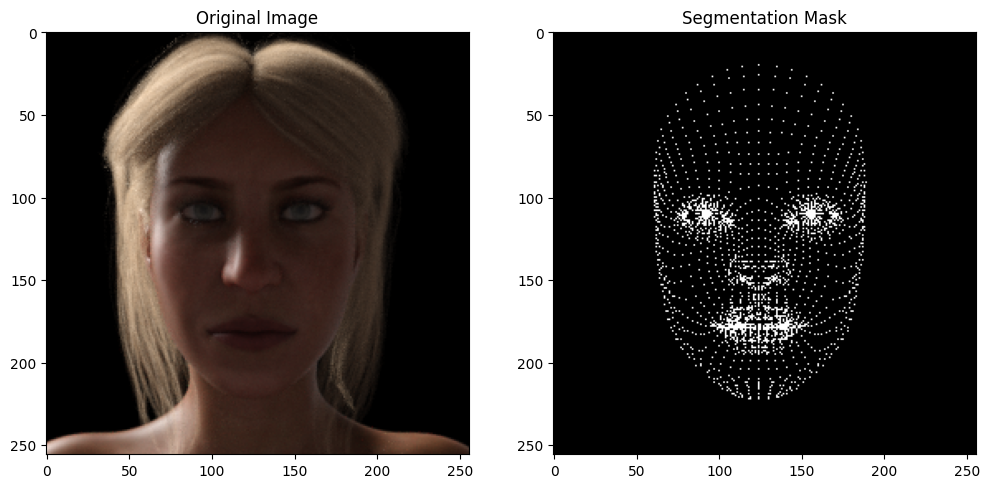

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

def load_face_image(face_id, batch_id, camera_type, root_path):
    image_path = os.path.join(root_path, "batch{:02d}".format(batch_id), "Rendering")
    image_name = "Render_{}_{}.png".format(face_id, camera_type)
    
    image_fullname = os.path.join(image_path, image_name)
    image = mpimg.imread(image_fullname)
    
    return image

def load_face_row_image(pandas_row, root_path):
    face_id = pandas_row['id']
    batch_id = pandas_row['batch_id'] + 1
    camera_type = pandas_row['camera_type']
    
    image = load_face_image(face_id, batch_id, camera_type, root_path)
    
    return image

def remove_outliers(coordinates, threshold=3):
    x_coords = np.array([x for x, y in coordinates])
    y_coords = np.array([y for x, y in coordinates])
    
    x_mean, x_std = np.mean(x_coords), np.std(x_coords)
    y_mean, y_std = np.mean(y_coords), np.std(y_coords)
    
    filtered_coords = [(x, y) for x, y in coordinates if (abs(x - x_mean) < threshold * x_std) and (abs(y - y_mean) < threshold * y_std)]
    
    return filtered_coords

pandas_row = df.sample(n=1).iloc[0]

image = load_face_row_image(pandas_row, TRAIN_PATH)
image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
image_height, image_width, _ = image.shape

non_zero_coords = np.argwhere(np.all(image != [0, 0, 0], axis=-1))
y_min_img, x_min_img = np.min(non_zero_coords, axis=0)
y_max_img, x_max_img = np.max(non_zero_coords, axis=0)

segmentation_mask = np.zeros((image_height, image_width), dtype=np.uint8)

coordinates = []
for col in df.columns:
    if col.endswith('_x'):
        y_col = col.replace('_x', '_y')
        x = pandas_row[col]
        y = pandas_row[y_col]
        coordinates.append((x, y))

coordinates = remove_outliers(coordinates)
coordinates = np.array(coordinates) / 2

for (x, y) in coordinates:
    segmentation_mask[-int(y), int(x)] = 255

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(segmentation_mask, cmap='gray')
axs[1].set_title('Segmentation Mask')

plt.show() 

### Batch 1 & Batch 2

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import json
from scipy.spatial.distance import cdist

def load_face_image(face_id, batch_id, camera_type, root_path):
    if camera_type == 'Camera_Front':
        text = 'Front'
    elif camera_type == 'Camera_45':
        text = 'Angle'
    elif camera_type == 'Camera_Side':
        text = 'Side'
    else:
        raise ValueError(f"Unknown camera type: {camera_type}")

    image_path = os.path.join(root_path, "batch{:02d}".format(batch_id + 1), "Rendering")
    image_name = "Render_{}_{}.png".format(face_id, text)
    image_fullname = os.path.join(image_path, image_name)
    image = mpimg.imread(image_fullname)
    
    return image

def remove_outliers(coordinates, threshold=3):
    x_coords = np.array([x for x, y in coordinates])
    y_coords = np.array([y for x, y in coordinates])
    
    x_mean, x_std = np.mean(x_coords), np.std(x_coords)
    y_mean, y_std = np.mean(y_coords), np.std(y_coords)
    
    filtered_coords = [(x, y) for x, y in coordinates if (abs(x - x_mean) < threshold * x_std) and (abs(y - y_mean) < threshold * y_std)]
    
    return filtered_coords

def create_segmentation_mask(image, coordinates, changes):
    image_height, image_width, _ = image.shape
    segmentation_mask = np.zeros((image_height, image_width, 3), dtype=np.uint8)
    
    for (x, y) in coordinates:
        segmentation_mask[-int(y), int(x)] = [255, 255, 255]  # White for original coordinates
    
    for (x, y) in changes:
        segmentation_mask[-int(y), int(x)] = [255, 0, 0]  # Red for detected changes
    
    return segmentation_mask

def load_vertex_data(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()

    data = {}
    parsing_coordinates = False
    current_key = None
    for line in lines:
        line = line.strip()
        if line.startswith('"batch"'):
            batch_info = line.split('[')[1].split(']')[0].replace('"', '').split(',')
            batch_id = int(batch_info[0].split('=')[1])
            camera_type = batch_info[1].split('=')[1]
            image_id = int(batch_info[2].split('=')[1])
            current_key = (batch_id, camera_type, image_id)
            data[current_key] = []
        elif line.startswith('"indexes"'):
            parsing_coordinates = True
        elif parsing_coordinates:
            if line.startswith('}'):
                parsing_coordinates = False
            else:
                key_value = line.split(':')
                if len(key_value) == 2:
                    coord_str = key_value[1].strip().strip('[],')
                    coords = [float(x) for x in coord_str.split(',')]
                    data[current_key].append(coords)

    return data

def find_changes(current_coords, previous_coords, distance_threshold=0.1):
    current_coords = np.array(current_coords)
    previous_coords = np.array(previous_coords)
    
    if len(previous_coords) == 0:
        return current_coords.tolist()
    
    distances = cdist(current_coords, previous_coords, 'euclidean')
    min_distances = distances.min(axis=1)
    
    changes = current_coords[min_distances > distance_threshold]
    
    return changes.tolist()

def save_change_detection_images(vertex_filepath, root_path, save_path, num_plots=10, batch_ids=0):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    vertex_data = load_vertex_data(vertex_filepath)

    camera_types = ["Camera_Front", "Camera_45", "Camera_Side"]
    batch_ids = [batch_ids]
    image_ids = range(49)  
    
    plot_samples = random.sample([(batch_id, camera_type, image_id) for batch_id in batch_ids for camera_type in camera_types for image_id in image_ids], num_plots)

    for (batch_id, camera_type, image_id) in plot_samples:
        key = (batch_id, camera_type, image_id)
        if key in vertex_data:
            coordinates = vertex_data[key]
            coordinates = remove_outliers(coordinates)
            image = load_face_image(image_id, batch_id, camera_type, root_path)
            image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

            changes = []
            if image_id > 0:
                previous_key = (batch_id, camera_type, image_id - 1)
                if previous_key in vertex_data:
                    previous_coordinates = vertex_data[previous_key]
                    previous_coordinates = remove_outliers(previous_coordinates)
                    changes = find_changes(coordinates, previous_coordinates)
                    print(changes)

            mask = create_segmentation_mask(image, coordinates, changes)
            
            change_image_name = f"Change_{image_id}_{camera_type}.png"
            change_image_path = os.path.join(save_path, change_image_name)
            
            cv2.imwrite(change_image_path, mask)
            
            # Plot only a few samples
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(image)
            axs[0].set_title('Original Image')
            axs[1].imshow(mask)
            axs[1].set_title('Segmentation Mask with Changes')
            axs[2].imshow(image)
            axs[2].imshow(mask, alpha=0.5)
            axs[2].set_title('Overlayed Mask on Image')
            
            plt.tight_layout()
            plot_image_path = os.path.join(save_path, f"Plot_{image_id}_{camera_type}.png")
            plt.savefig(plot_image_path)
            plt.close()

IMG_PATH = '/media/kursat/TOSHIBA EXT13/projects/FitSpace/Task-CV-FitSpace.Fashion/parameter set'
SAVE_PATH = '/media/kursat/TOSHIBA EXT13/projects/FitSpace/Task-CV-FitSpace.Fashion/parameter set/batch01/output'

save_change_detection_images(vertex_param_1_filepath, IMG_PATH, SAVE_PATH, batch_ids=0)

[[396.801071166992, 259.713836669922], [418.266754150391, 261.343414306641], [412.338424682617, 263.193756103516], [404.681442260742, 263.041198730469], [422.808670043945, 257.410522460938], [410.551177978516, 270.304290771484], [401.876037597656, 269.599822998047], [422.21125793457, 267.053009033203], [417.180328369141, 269.053924560547], [351.536422729492, 236.931442260742], [411.807083129883, 254.781311035156], [407.627716064453, 245.406509399414], [416.136871337891, 251.209411621094], [404.257919311523, 246.605987548828], [405.42643737793, 255.10920715332], [349.173858642578, 225.240234375], [358.758758544922, 232.314041137695], [360.389129638672, 243.950469970703], [364.610717773438, 228.646331787109], [399.143798828125, 252.764083862305], [356.479187011719, 221.419357299805], [422.608139038086, 260.39453125], [432.878479003906, 261.824584960938], [431.131088256836, 264.058471679688], [427.903213500977, 264.140899658203], [433.046005249023, 257.4970703125], [429.883590698242, 272.

In [30]:
IMG_PATH = '/media/kursat/TOSHIBA EXT13/projects/FitSpace/Task-CV-FitSpace.Fashion/parameter set'
SAVE_PATH = '/media/kursat/TOSHIBA EXT13/projects/FitSpace/Task-CV-FitSpace.Fashion/parameter set/batch02/output'

save_change_detection_images(vertex_param_2_filepath, IMG_PATH, SAVE_PATH, batch_ids=1)

### 3-4. Change Detection Model

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

def load_face_image(face_id, batch_id, camera_type, root_path):
    if camera_type == 'Front':
        text = 'Front'
    elif camera_type == 'Angle':
        text = 'Angle'
    elif camera_type == 'Side':
        text = 'Side'
    else:
        raise ValueError(f"Unknown camera type: {camera_type}")

    image_path = os.path.join(root_path, f"batch{batch_id + 1:02d}", "Rendering")
    image_name = f"Render_{face_id}_{text}.png"
    image_fullname = os.path.join(image_path, image_name)
    image = mpimg.imread(image_fullname)
    
    image = preprocess_image(image)
    
    return image

def preprocess_image(image):
    if image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = gray / 255.0
    gray = cv2.resize(gray, (256, 256))
    
    return gray

def remove_outliers(coordinates, threshold=3):
    x_coords = np.array([x for x, y in coordinates])
    y_coords = np.array([y for x, y in coordinates])
    
    x_mean, x_std = np.mean(x_coords), np.std(x_coords)
    y_mean, y_std = np.mean(y_coords), np.std(y_coords)
    
    filtered_coords = [(x, y) for x, y in coordinates if (abs(x - x_mean) < threshold * x_std) and (abs(y - y_mean) < threshold * y_std)]
    
    return filtered_coords

def create_segmentation_mask(image, coordinates):
    image_height, image_width = image.shape
    segmentation_mask = np.zeros((image_height, image_width), dtype=np.uint8)
    
    for (x, y) in coordinates:
        segmentation_mask[-int(y), int(x)] = 255  # White for original coordinates
    
    return segmentation_mask

def align_coordinates(current_coords, previous_coords):
    aligned_coords = []
    distances = cdist(current_coords, previous_coords, 'euclidean')
    for current_point in current_coords:
        min_index = np.argmin(distances, axis=1)[0]
        aligned_coords.append(previous_coords[min_index])
    return np.array(aligned_coords)

def create_change_mask(mask1, mask2):
    aligned_mask2 = align_images(mask1, mask2)
    change_mask = np.abs(mask1 - aligned_mask2)
    change_mask = np.where(change_mask > 0, 1, 0)
    
    return change_mask

def align_images(img1, img2):
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x:x.distance)
    
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
    
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    h,w = img1.shape
    aligned_img2 = cv2.warpPerspective(img2, M, (w,h))
    
    return aligned_img2

def siamese_network(input_shape):
    input = Input(input_shape)
    x = Conv2D(64, (10, 10), activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (7, 7), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (4, 4), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(256, (4, 4), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(4096, activation='sigmoid')(x)
    model = Model(input, x)
    return model

def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

def train_siamese_network(df, root_path, model_save_path, batch_size=16, epochs=10):
    images1 = []
    images2 = []
    labels = []

    for idx, row in df.iterrows():
        face_id = row['id']
        batch_id = row['batch_id']
        camera_type = row['camera_type']
        
        if face_id == 0:
            continue
        
        image1 = load_face_image(face_id - 1, batch_id, camera_type, root_path)
        image2 = load_face_image(face_id, batch_id, camera_type, root_path)
        
        coordinates1 = row[3:].values.reshape(-1, 2) / 2  # Divide coordinates by 2
        coordinates2 = row[3:].values.reshape(-1, 2) / 2  # Divide coordinates by 2
        
        coordinates1 = remove_outliers(coordinates1)
        coordinates2 = remove_outliers(coordinates2)
        
        mask1 = create_segmentation_mask(image1, coordinates1)
        mask2 = create_segmentation_mask(image2, coordinates2)
        
        change_mask = create_change_mask(mask1, mask2)
        label = np.sum(change_mask) > 0
        
        images1.append(image1)
        images2.append(image2)
        labels.append(label)
    
    images1 = np.array(images1).reshape(-1, 256, 256, 1)
    images2 = np.array(images2).reshape(-1, 256, 256, 1)
    labels = np.array(labels).reshape(-1, 1)
    
    X_train1, X_val1, y_train, y_val = train_test_split(images1, labels, test_size=0.2, random_state=42)
    X_train2, X_val2, _, _ = train_test_split(images2, labels, test_size=0.2, random_state=42)
    
    input_shape = (256, 256, 1)
    base_network = siamese_network(input_shape)
    
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    processed_a = base_network(input_a)
    processed_b = base_network(input_b)
    
    distance = Lambda(lambda x: K.abs(x[0] - x[1]))([processed_a, processed_b])
    outputs = Dense(1, activation='sigmoid')(distance)
    
    model = Model([input_a, input_b], outputs)
    model.compile(optimizer='adam', loss=contrastive_loss, metrics=['accuracy'])
    
    model.fit([X_train1, X_train2], y_train, batch_size=batch_size, epochs=epochs, validation_data=([X_val1, X_val2], y_val))
    
    model.save(model_save_path)
    
    return model

def detect_changes_with_siamese(model, image1, image2):
    image1 = preprocess_image(image1)
    image2 = preprocess_image(image2)
    
    input_data1 = np.expand_dims(image1.reshape(256, 256, 1), axis=0)
    input_data2 = np.expand_dims(image2.reshape(256, 256, 1), axis=0)
    
    prediction = model.predict([input_data1, input_data2])[0][0]
    changes = prediction > 0.5
    
    return changes

def save_change_detection_images(df, root_path, save_path, model, num_plots=10, batch_ids=[0]):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    plot_samples = df[df['batch_id'].isin(batch_ids)].sample(n=num_plots)

    for idx, row in plot_samples.iterrows():
        face_id = row['id']
        batch_id = row['batch_id']
        camera_type = row['camera_type']
        coordinates = row[3:].values.reshape(-1, 2) / 2  # Divide coordinates by 2

        coordinates = remove_outliers(coordinates)
        image = load_face_image(face_id, batch_id, camera_type, root_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

        changes = []
        if face_id > 0:
            previous_image = load_face_image(face_id - 1, batch_id, camera_type, root_path)
            changes = detect_changes_with_siamese(model, previous_image, image)

        mask = create_segmentation_mask(image, coordinates)
        
        change_image_name = f"Change_{face_id}_{camera_type}.png"
        change_image_path = os.path.join(save_path, change_image_name)
        
        cv2.imwrite(change_image_path, mask)
        
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(image_rgb)
        axs[0].set_title('Original Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Segmentation Mask')
        axs[2].imshow(image_rgb)
        axs[2].imshow(mask, cmap='gray', alpha=0.5)
        axs[2].set_title('Overlayed Mask on Image')
        
        plt.tight_layout()
        plot_image_path = os.path.join(save_path, f"Plot_{face_id}_{camera_type}.png")
        plt.savefig(plot_image_path)
        plt.close()

# Example usage
IMG_PATH = '/media/kursat/TOSHIBA EXT13/projects/FitSpace/Task-CV-FitSpace.Fashion/train set'
SAVE_PATH = '/media/kursat/TOSHIBA EXT13/projects/FitSpace/Task-CV-FitSpace.Fashion/train set/batch01/output'
MODEL_SAVE_PATH = '/media/kursat/TOSHIBA EXT13/projects/FitSpace/Task-CV-FitSpace.Fashion/train set/batch01/siamese_model.h5'

# Train the model first
model = train_siamese_network(df, IMG_PATH, MODEL_SAVE_PATH, batch_size=16, epochs=10)

# Load the model and use it for change detection
model = tf.keras.models.load_model(MODEL_SAVE_PATH, custom_objects={'contrastive_loss': contrastive_loss})
save_change_detection_images(df, IMG_PATH, SAVE_PATH, model, num_plots=10, batch_ids=[0])